# Scraping

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
link = 'https://killedby.tech'

In [3]:
link

'https://killedby.tech'

In [4]:
responce = requests.get(link)
html = responce.text

In [5]:
soup = BeautifulSoup(html,'html')

In [6]:
len(soup)

2

In [7]:
col = ['Company','Name', 'Type','Desc', 
       'Life','Status', 'Began','Ended','Age']
df = pd.DataFrame(columns = col)
line = 0 
year = soup.find_all('div', {'class':'_productList_1tzsc_67'})
for i in range( 1,len(year)):
    product = year[i].find_all('div', {'class':'_product_1tzsc_67'})
    for j in range( len(product) - 1):
        product_name = product[j].find('a').text
        product_life = product[j].find('div', {'class':'_metaData_1tzsc_161'}).text
        product_desc = product[j].text
        product_type = ''
        product_status = ''
        product_began = 0 
        product_ended = 0
        product_company = product[j].find('img')
        product_company = product_company.get('alt')
        product_age = 0

        if product_company != 'Ghost':
            product_company = product_company[0: product_company.index(' ')]
            product_company = product_company.strip()
        
        if product_life.find('service') > -1:
            index = product_life.index('service')
            product_type = product_life[index:]
            product_life = product_life[0:index]
        if len(product_life) > 11:
            product_type = product_life[11:12]
            
            if product_type == 'a':
                product_type = 'app'
            elif product_type == 'h':
                product_type = 'hardware'
            elif product_type == 's':
                product_type = 'service'
             
            
            product_life = product_life[0:11]
        
        product_began = product_life[0:4]
        product_began = product_began.strip()
        product_began = int(product_began)
        product_ended = product_life[-4:]
        product_ended = product_ended.strip()
        product_ended = int(product_ended)
        
        index = 0
        if product_desc.find('Scheduled') > -1:
            index = product_desc.index('Scheduled')
            product_desc = product_desc[index:]
            
        elif product_name == product_desc[0: len(product_name)]:
            product_desc = product_desc[len(product_name):]
            if product_life == product_desc[0: len(product_life)]:
                product_desc = product_desc[len(product_life):]
            if product_type == product_desc[0: len(product_type)]:
                product_desc = product_desc[len(product_type):]
        if product_desc.find('Expiring') > -1:
            index = product_desc.index(',')
            product_status = product_desc[0:index]
            product_desc = product_desc[index+1:]
        else:
            product_status = 'Killed'

        
        product_age = product_ended - product_began
        row = [product_company, product_name, product_type, 
               product_desc, product_life, product_status, 
               product_began,product_ended, product_age]
        df.loc[line] = row
        line += 1
    
df.head()

,Company,Name,Type,Desc,Life,Status,Began,Ended,Age
0,Google,Google Jamboard,app,Google Jamboard was a web and native whiteboa...,2016 – 2024,Expiring in 5 months,2016,2024,8
1,Google,Jamboard,hardware,"Will be turned off in 2 months, Jamboard was a...",2017 – 2024,Killed,2017,2024,7
2,Microsoft,Visual Studio for Mac,app,"Walks into the light in about 1 month, Visual ...",2017 – 2024,Killed,2017,2024,7
3,Microsoft,Xbox Games Store,service,"Fading into darkness in 1 day, Xbox Games Stor...",2005 – 2024,Killed,2005,2024,19
4,Google,DropCam,hardware,Dropcam was a line of Wi-Fi/cloud-based video ...,2009 – 2024,Killed,2009,2024,15


# Analysis and Stats

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = df.sort_values('Ended')

year = []
count = []
y = df['Ended'].min()
for i in range(df['Ended'].min(), df['Ended'].max() + 1):
    year.append(y)
    y += 1
    count.append(0)
for i in range( len(df)):
    y = df.loc[i]['Ended']
    if y in year:
        index = year.index(y)
        count[index] += 1
        

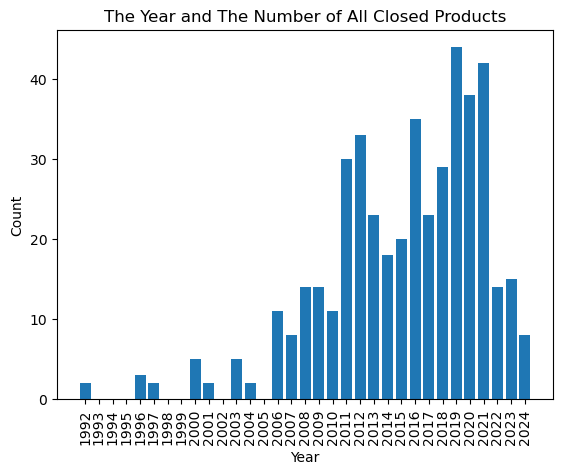

In [11]:
plt.title('The Year and The Number of All Closed Products')
plt.xlabel('Year')
plt.xticks(year,year,rotation=90)
plt.ylabel('Count')
plt.bar(year,count)
plt.show()

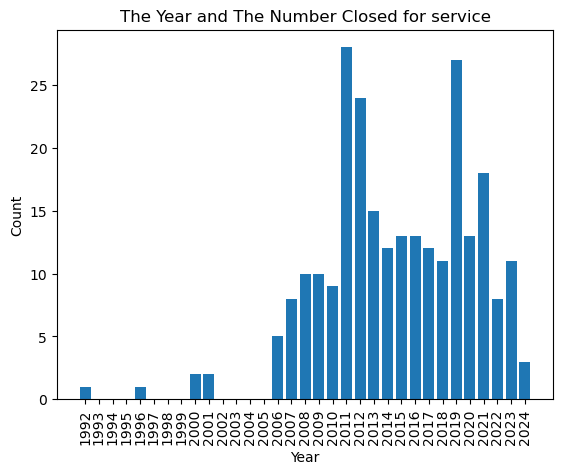

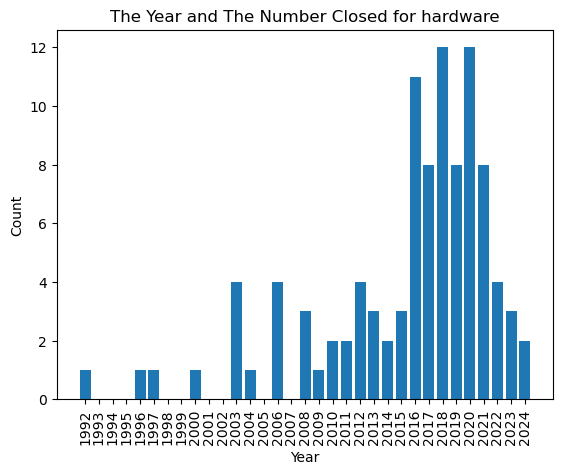

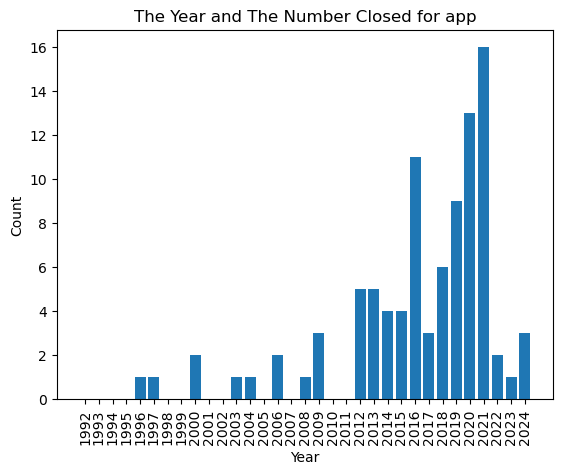

In [12]:
def bar_graph_for(df,ptype):
    df = df.sort_values('Ended')
    year = []
    count = []
    y = df['Ended'].min() 
    for i in range(df['Ended'].min(), df['Ended'].max() +1):
        year.append(y)
        y += 1
        count.append(0)
    for i in range( len(df)):
        y = df.loc[i]['Ended']
        y = int(y)
        if df.loc[i]['Type'] == ptype:
            index = year.index(y)
            count[index] += 1
    
    plt.title('The Year and The Number Closed for ' + ptype )
    plt.xlabel('Year')
    plt.xticks(year,year,rotation=90)
    plt.ylabel('Count')
    plt.bar(year,count)
    plt.show()
bar_graph_for(df,'service')
bar_graph_for(df,'hardware')
bar_graph_for(df,'app')

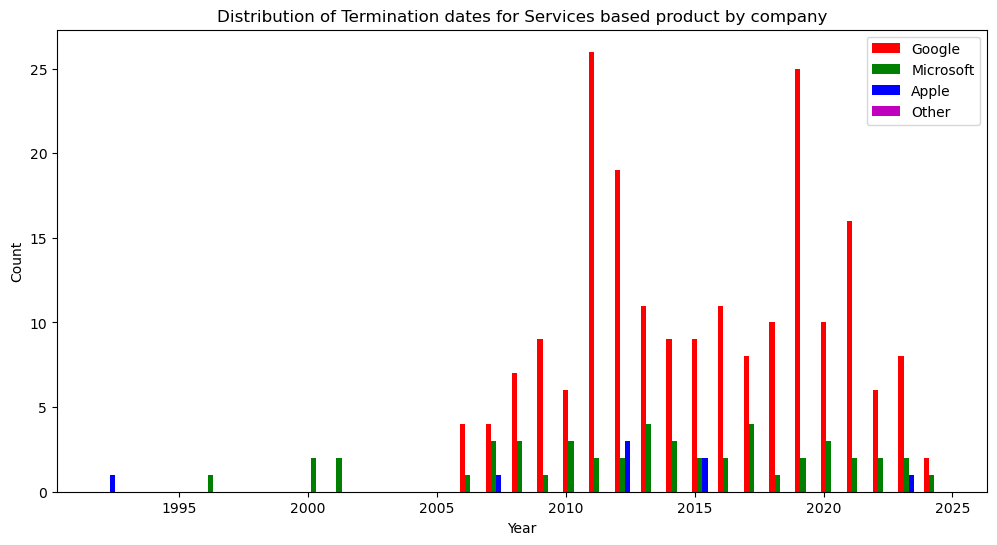

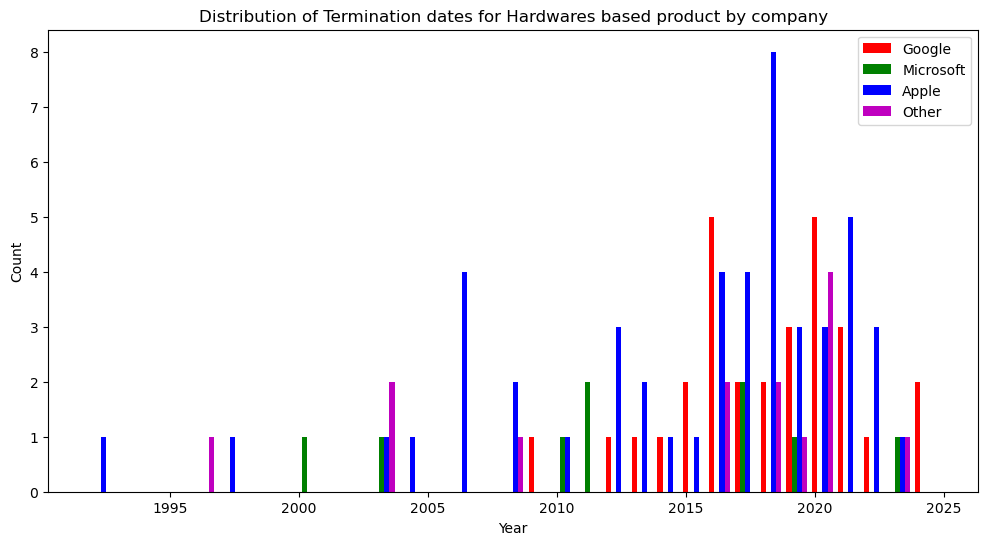

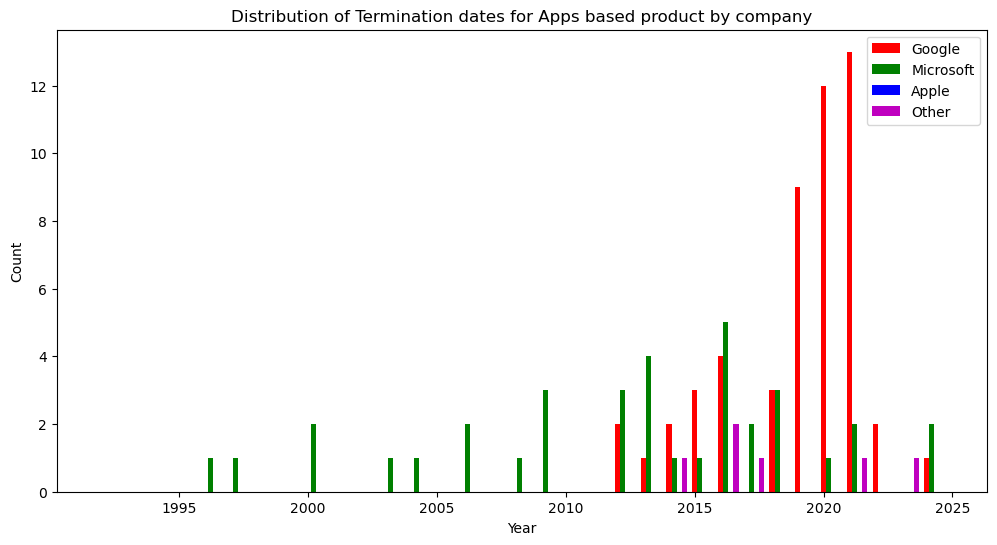

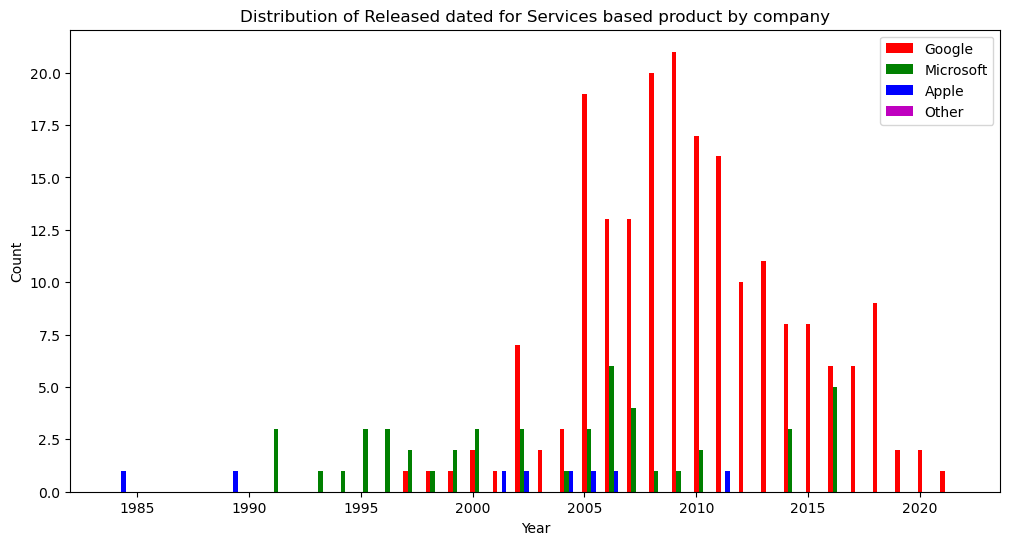

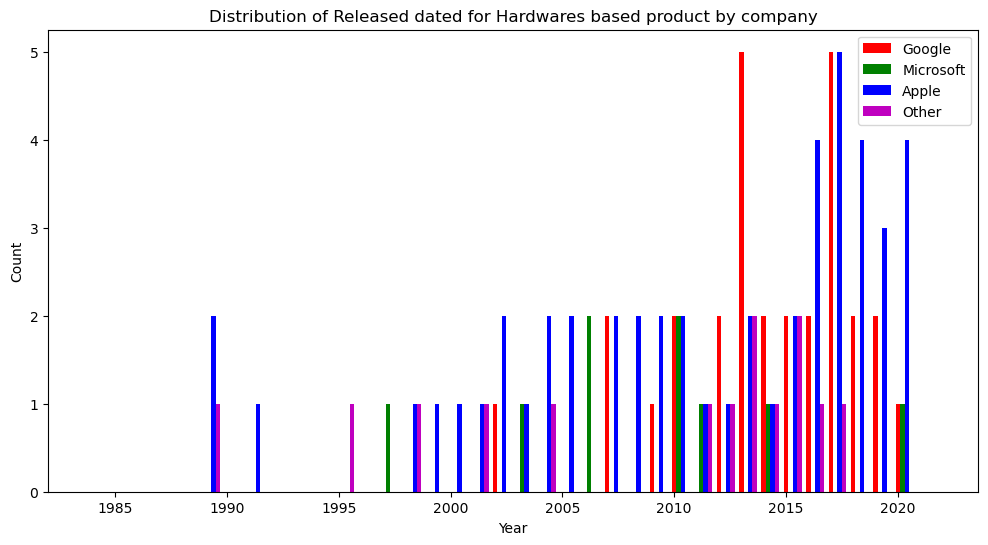

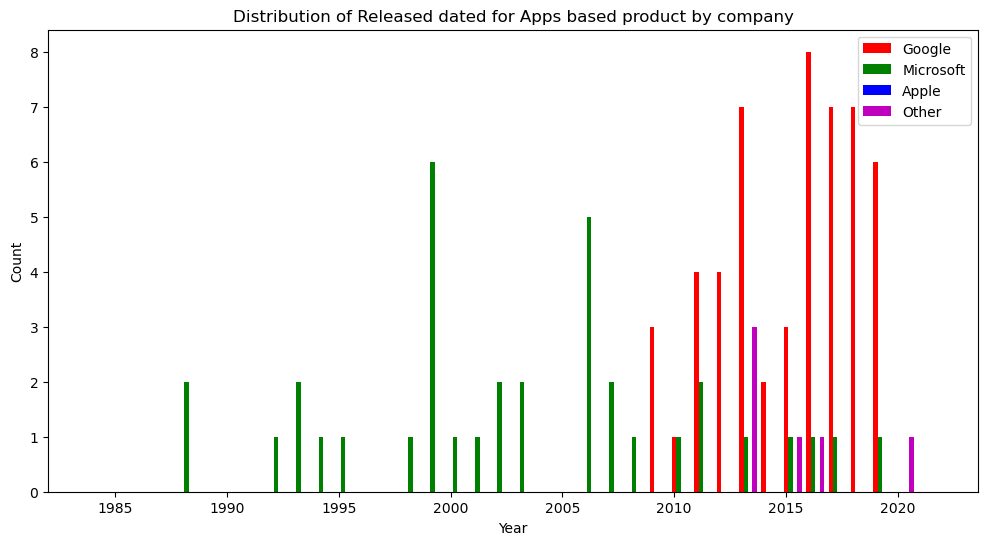

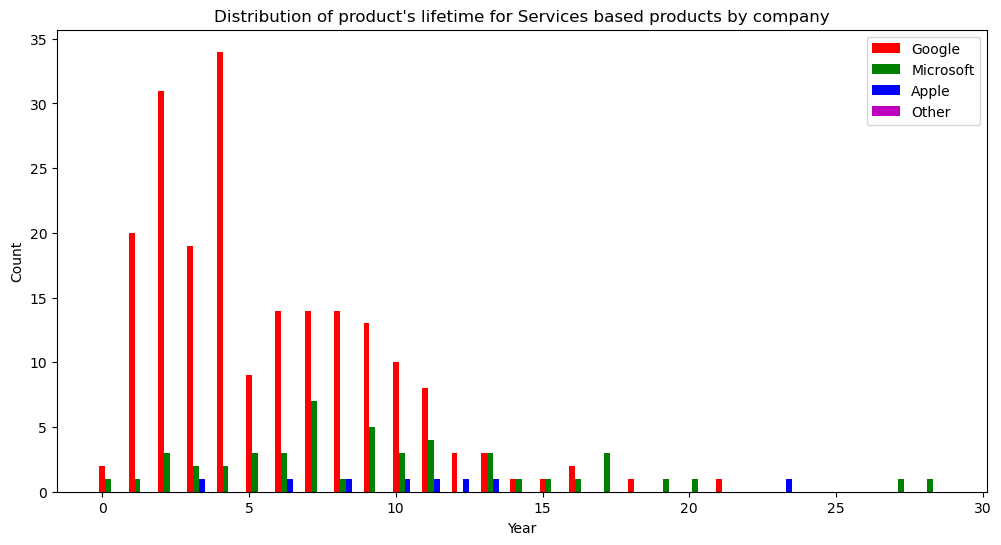

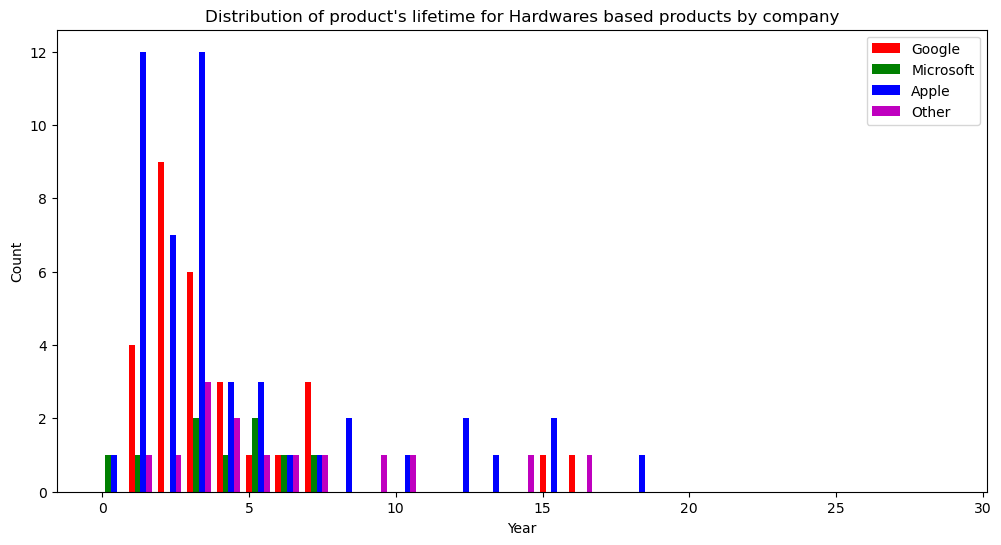

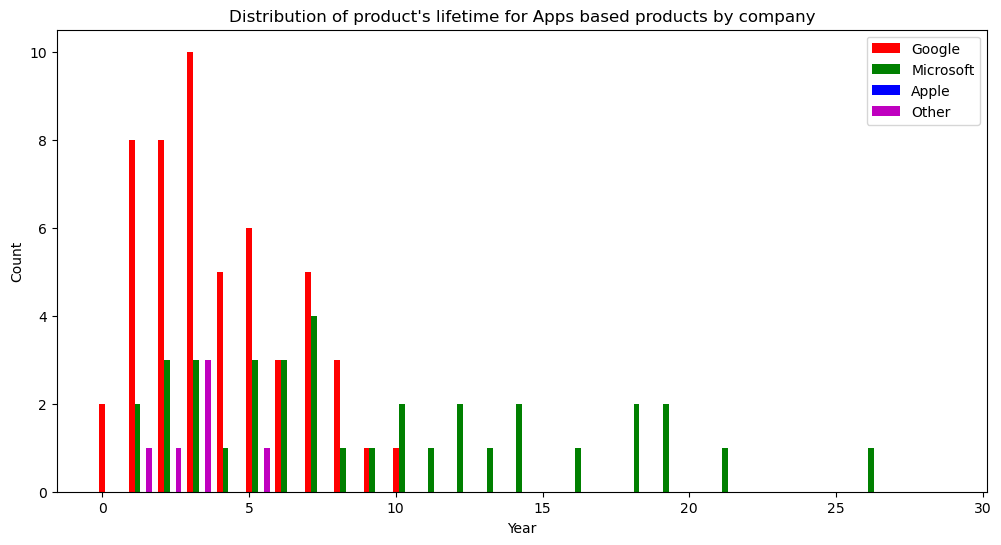

In [13]:
# return a list that contains the count of product that meet a certain 
# condition by index
def get_count(df, big3, comp_count, comp_year, date,ptype):
    import copy
    c = []
    while len(c) != len(comp_year):
        c.append(0)
    for i in range(0,4):
        
        comp_count.append(copy.deepcopy(c))
    
    
    for i in range( len(df)):
        if df.loc[i]['Type'] == ptype:
            comp = df.loc[i]['Company']
            the_year = df.loc[i][date]
            the_year = int(the_year)
            year_index = comp_year.index(the_year)
            
            
            if comp == big3[0]:
                comp_count[0][year_index] += 1
                
            elif comp == big3[1]:
                comp_count[1][year_index] += 1
                
            elif comp == big3[2]:
                comp_count[2][year_index] += 1
                
            else:
                comp_count[3][year_index] += 1
    return comp_count
    
    
# Creates the visualizations
def by_comp_bar_graph_for(df,ptype,date):
    import copy
    big3 = ['Google', 'Microsoft', 'Apple','Other']

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    width = .2
    comp_year = list( range( df[date].min(), df[date].max() + 1))
    
    if date == 'Began' or date == 'Ended':
        df = df.sort_values(date, ascending=False)
    
        
        comp_count = []
        comp_count = get_count(df,big3,comp_count,comp_year,date,ptype)
        
        
        comp_year1 = copy.deepcopy(comp_year)
        comp_year2 = copy.deepcopy(comp_year)
        comp_year3 = copy.deepcopy(comp_year)
        for i in range(len(comp_year)):
            comp_year1[i] += width
            comp_year2[i] += width*2
            comp_year3[i] += width*3
        
        plt.legend(big3)
        if date == 'Ended':
            plt.title('Distribution of Termination dates for ' + ptype.capitalize()+ 's based product by company')
        elif date == 'Began':
            plt.title('Distribution of Released dated for ' + ptype.capitalize()+ 's based product by company')
    
    elif date == 'Age':
        comp_count = []
        comp_count = get_count(df,big3,comp_count,comp_year,date,ptype)

        comp_year1 = copy.deepcopy(comp_year)
        comp_year2 = copy.deepcopy(comp_year)
        comp_year3 = copy.deepcopy(comp_year)
        for i in range(len(comp_year)):
            comp_year1[i] += width
            comp_year2[i] += width*2
            comp_year3[i] += width*3
            
        plt.title('Distribution of product\'s lifetime for ' + ptype.capitalize()+ 's based products by company')

        
    # plotting
        
    x1 = ax.bar(comp_year,comp_count[0], width, color='r', label=big3[0])
    x2 = ax.bar(comp_year1,comp_count[1], width, color='g',label=big3[1])
    x3 = ax.bar(comp_year2,comp_count[2], width, color='b',label=big3[2])
    x4 = ax.bar(comp_year3,comp_count[3], width, color='m',label=big3[3])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Visualizing of products terminations dates
by_comp_bar_graph_for(df,'service', 'Ended')
by_comp_bar_graph_for(df,'hardware','Ended')
by_comp_bar_graph_for(df,'app','Ended')

# Visualizing of product launches dates
by_comp_bar_graph_for(df,'service', 'Began')
by_comp_bar_graph_for(df,'hardware','Began')
by_comp_bar_graph_for(df,'app','Began')

# Visualizing lifespans of produces
by_comp_bar_graph_for(df,'service','Age')
by_comp_bar_graph_for(df,'hardware','Age')
by_comp_bar_graph_for(df,'app','Age')